

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.4%20%EC%B6%94%EC%84%B8%20%EC%A7%80%ED%91%9C%20MACD-input.ipynb)


# MACD(Moving Average Convergence and Divergence)

MACD는 이동평균 수렴확산 지수(移動平均 收斂擴散 指數, 영어: moving average convergence divergence)의 약자로 1970년대 후반에 제럴드 아펠(Gerald Appel)이 만든 주가의 기술적 분석에 사용되는 지표이다. MACD는 주가 추세의 강도, 방향, 모멘텀 및 지속 시간의 변화를 나타내도록 설계되었다.

MACD는 과거의 가격 데이터(대부분 증가)로부터 계산된 세 가지 시계열의 모음이다. 이러한 세 가지 시계열은 MACD 고유의 "신호", "평균", "확산"이다. MACD는 장기 지수이동평균과 단기 지수이동평균 간의 차이이다. 평균은 MACD 자체의 지수이동평균이다.

* 출처 : [MACD - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/MACD)

주가의 단기 이동평균선과 장기 이동평균선의 수렴과 확산을 나타내는 지표이다. 단기 이동평균선과 장기 이동평균선이 주가의 변동으로 인해 수렴과 확산을 반복한다는 원리에 기반을 두고 두 이동평균선의 차이가 가장 큰 시점을 찾아내 추세 변화의 신호로 삼는 지표이다. MACD는 크게 MACD 선과 시그널선(signal line)으로 구성된다. **MACD 선은 단기 지수이동평균과 장기 지수이동평균의 차이로 구해지며 일반적으로 단기 이동평균선의 경우 12일, 장기 이동평균선의 경우 26일이 이용된다.** <font color="red">단기 지수이동평균이 장기 지수이동평균보다 위쪽에 위치하면 MACD선은 양수가 되고 이것은 주가가 상승하는 신호로 여겨진다.</font>  반대로 <font color="blue">단기 지수이동평균이 장기 지수이동평균보다 아래쪽에 있으면 MACD 선은 음수가 되고 이것은 주가가 하락하는 신호로 여겨진다.</font> 

시그널선은 일정 기간 동안의 MACD지수 이동평균으로 정의되며 일반적으로 MACD의 9일 지수이동평균이 이용된다. 즉 12일 동안의 지수이동평균과 26일 동안의 지수이동평균을 구한 후 이들 간의 차이를 다시 9일 동안의 지수이동평균으로 산출하는 것이다. MACD선과 시그널선이 교차하는 시점이 바로 단기 이동평균과 장기 이동평균간의 차이가 가장 큰 것으로 간주된다. 그래서 MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호, 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호로 해석된다.

MACD는 추세 전환 시점을 예측하기보다 **추세의 방향과 주가의 움직임을 분석하는 데 유용한 지표**로 평가된다.

[네이버 지식백과] MACD [Moving Average Convergence and Divergence] (두산백과)

* 출처 : https://terms.naver.com/entry.nhn?docId=5868194&cid=40942&categoryId=31830

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/MACDpicwiki.gif">

이미지 출처 : [MACD - Wikipedia](https://en.wikipedia.org/wiki/MACD)

## MACD의 세가지 지표
1. MACD = 12일 이동평균선 - 26일 이동평균선
2. MACD Signal = MACD의 9일 이동평균선
3. 0선 = 지표값의 양/음을 나타내는 기준석(직선)

## 라이브러리 로드

In [1]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# FinanceDataReader 불러오기
import FinanceDataReader as fdr

## 개별종목 일별시세 가져오기

In [42]:
# 005930 : 삼성전자
df = fdr.DataReader("005930", "2020", "2021")
df.shape

(248, 6)

In [43]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


## 지수이동평균 구하기
* 단순이동평균선은 추세전환 신호가 늦게 나타난다는 단점이 있기 때문에 이를 해결하기 위해서 MACD에서는 지수이동평균을 사용합니다.

In [13]:
# 12일, 26일에 대한 지수이동평균을 구합니다.
short = 12
long = 26
df["ema_short"] = df['Close'].ewm(short).mean()
df["ema_long"] = df['Close'].ewm(long).mean()

<Axes: xlabel='Date'>

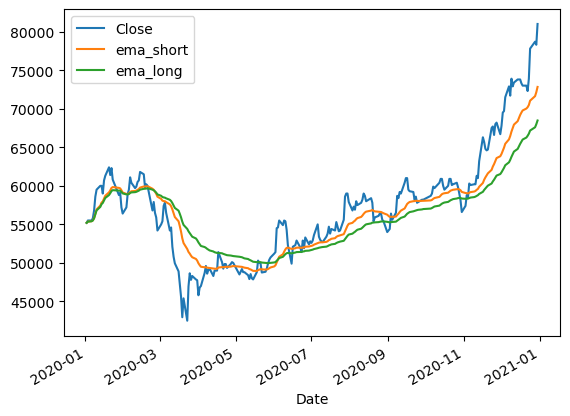

In [14]:
# "Close", "ema_short", "ema_long" 을 시각화 합니다.
df[["Close", "ema_short", "ema_long"]].plot()

## MACD값 구하기

In [16]:
# MACD = 단기 지수이동평균 - 장기 지수이동평균
df["MACD"] = df['ema_short'] - df['ema_long']

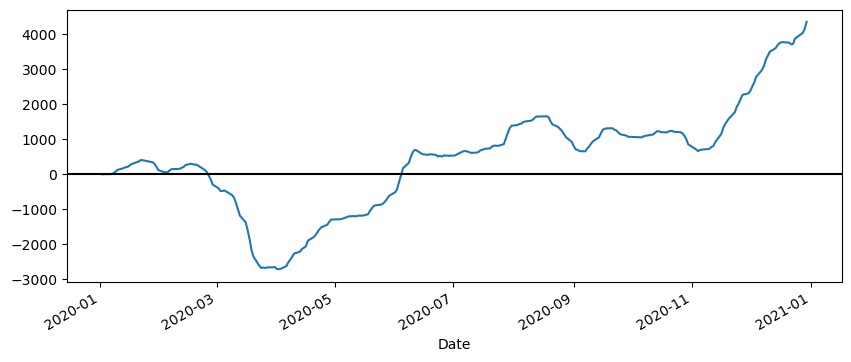

In [19]:
# MACD 값 시각화
df["MACD"].plot(figsize=(10,4))
plt.axhline(0, c='k')

## signal 값 구하기

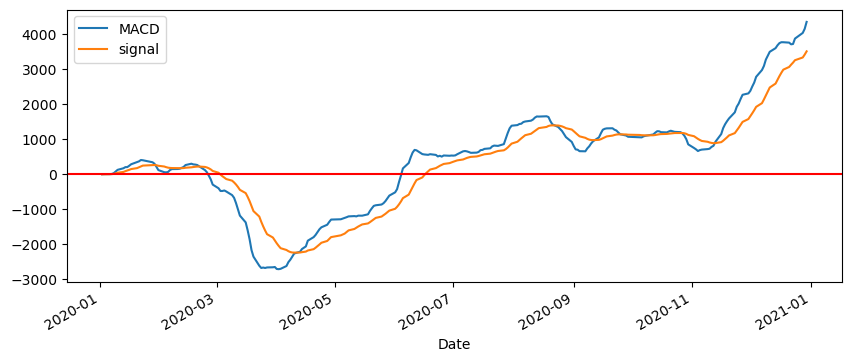

In [26]:
# MACD의 9일 이동평균값을 구합니다.
df["signal"] = df['MACD'].ewm(9).mean()

df[["MACD", "signal"]].plot(figsize=(10,4))
plt.axhline(0, c='r')

## MACD oscillator 값 구하기
* 볼린저 밴드의 %B 값
* RSI의 signal 값
* macdhist 값은 오실레이터(oscillator) 와 유사합니다.
* 기준선을 중심으로 아래위로 움직이는 성질을 갖는 지표를 오실레이터라 한다. 대개 추세 변화를 빨리 감지하려는 목적이며, 그래프의 기울기(변화량)를 측정하는 것과 비슷하다. 출처 : [스토캐스틱 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%86%A0%EC%BA%90%EC%8A%A4%ED%8B%B1)

<BarContainer object of 248 artists>

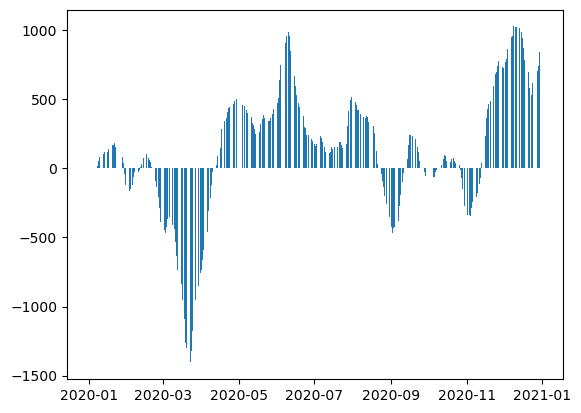

In [29]:
df["macdhist"] = df['MACD'] - df['signal']
# df["macdhist"].plot.bar()
plt.bar(df.index, df.macdhist)

## MACD 함수 만들기
* assign 을 사용한 컬럼 만들기
* pandas 의 ewm  : exponential weighted moving

In [36]:
# 각 주기에 5를 곱해서 short=60, long=130, t=45로 설정하면
# 매수매도가 빈번하게 생기는 것을 조정할 수 있습니다.
def make_macd(df, short=12, long=26, t=9):
    """
    데이터프레임을 받아 
    ema_short, ema_long, MACD, signal, macdhist 값을 생성하는 함수를 작성합니다.
    """
    ema_short = df['Close'].ewm(short).mean()
    ema_long = df['Close'].ewm(long).mean()
    MACD = ema_short - ema_long
    signal = MACD.ewm(t).mean()
    macdhist = MACD - signal
    df = df.assign(ema_short=ema_short, ema_long=ema_long, MACD=MACD, signal=signal, macdhist=macdhist)
    
    return df
    

In [45]:
# 함수를 통해 MACD변수를 생성합니다.
df = make_macd(df)
df.head()

,Open,High,Low,Close,Volume,Change,ema_short,ema_long,MACD,signal,macdhist
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.000000,55200.000000,0.000000,0.000000,0.000000
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55356.000000,55352.830189,3.169811,1.668322,1.501490
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55407.889126,55403.749407,4.139719,2.580276,1.559443
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55517.980831,55508.488552,9.492279,4.590164,4.902115
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55816.980100,55786.646004,30.334096,10.876685,19.457411


In [46]:
amd = fdr.DataReader("AMD", "2020", "2021")
amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


In [47]:
# MACD관련 변수가 잘 생성되었는지 확인합니다.
amd = make_macd(amd)

In [50]:
# macdhist 값을 확인합니다.
df["macdhist"].describe()

count     248.000000
mean      124.758228
std       459.393121
min     -1404.642148
25%       -70.799989
50%       143.932315
75%       401.228252
max      1024.555679
Name: macdhist, dtype: float64

<Axes: >

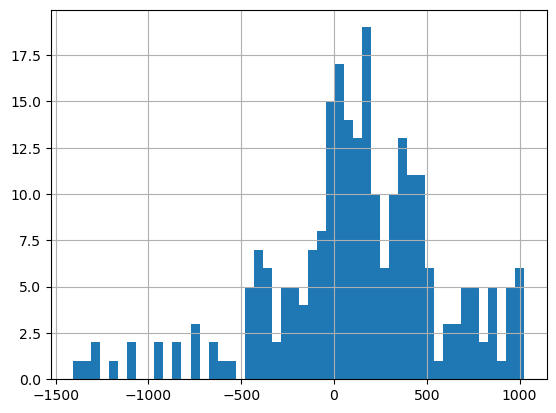

In [52]:
# macdhist 의 히스토그램을 그립니다.
df["macdhist"].hist(bins=50)

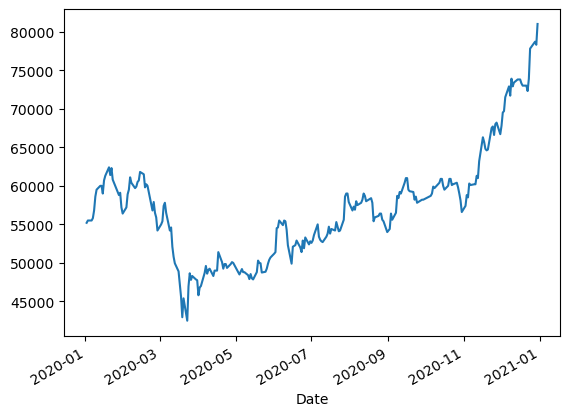

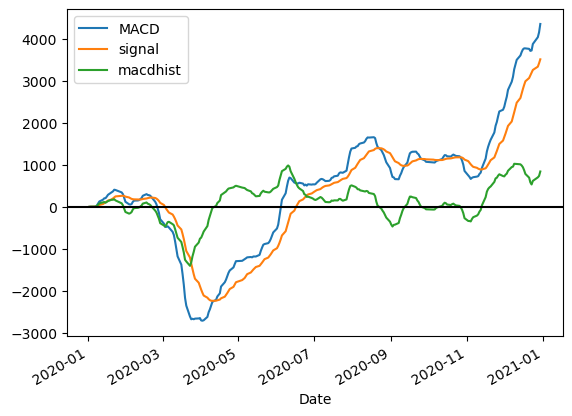

In [58]:
# "MACD", "signal", "macdhist" 값을 시각화 합니다.
df['Close'].plot()
df[["MACD", "signal", "macdhist"]].plot()
plt.axhline(0, c='k')

### 일부 구간의 데이터만 값을 표기하도록 변경

#### barplot의 숫자를 일부 구간만 표기하기

<Axes: xlabel='Date'>

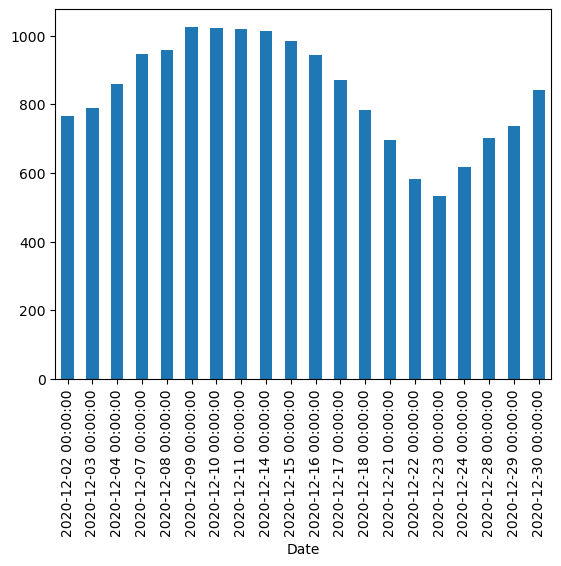

In [63]:
# 전체 기간의 데이터로 barplot을 그리면 lineplot과 다르게 모든 값이 표기되어 보기 어려운 문제가 있습니다.
# plt.bar(df.index, df.macdhist)
#너무 많으면 일부만 가져와서 그릴 수 있다.
df[-20:]['macdhist'].plot.bar()

<BarContainer object of 248 artists>

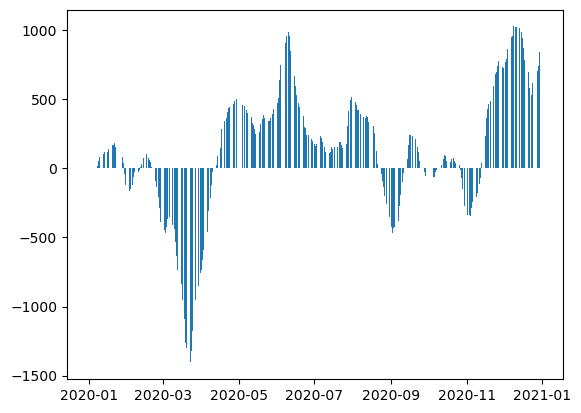

In [65]:
# Pandas의 막대그래프로 시각화를 할 때도 x축의 값을 커스텀하게 지정해 줄 수도 있지만
# matplotlib을 직접 사용해 그리는 것이 좀 더 간편합니다.
plt.bar(df.index, df.macdhist)

## MACD 시각화 

* MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호
* 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호
* (주의 : 매수 신호와 매도 신호는 지표에서 데이터를 보는 기준이기 때문에 실제 거래와는 맞지 않을 수 있습니다.)

In [67]:
ohlc_col = ["Open", "High", "Low", "Close"]

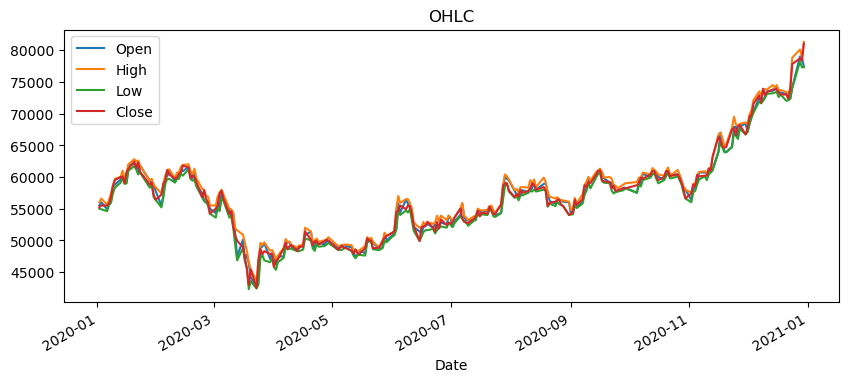

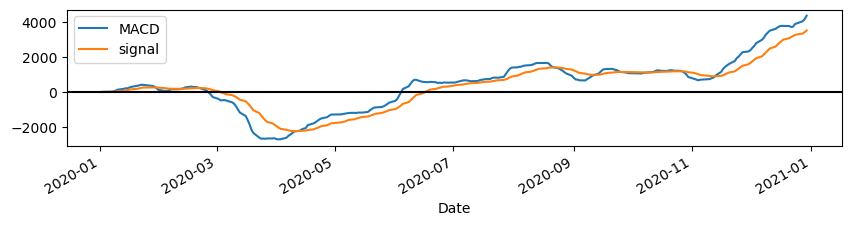

In [73]:
# OHLC와 MACD그래프를 시각화 합니다.
df[ohlc_col].plot(figsize=(10,4), title = 'OHLC')
df[["MACD", "signal"]].plot(figsize=(10,2))
plt.axhline(0, c='k')

Text(0.5, 1.0, 'MACD')

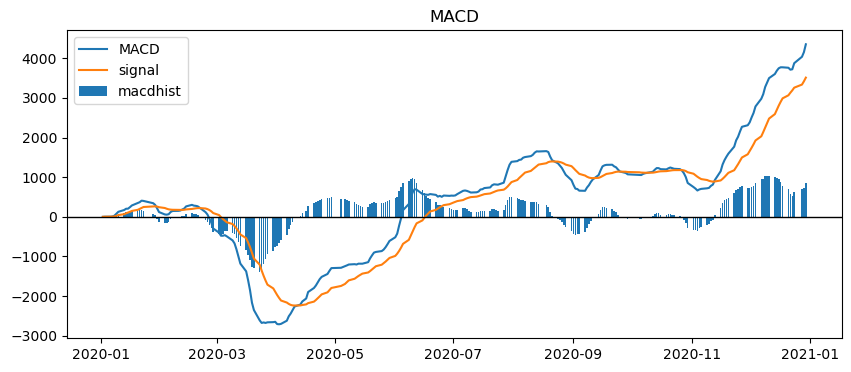

In [80]:
# matplotlib의 pyplot을 통해 MACD, signal, macdhist를 하나의 그래프에 시각화 합니다.
fig, axes = plt.subplots(figsize=(10,4))
plt.plot(df.index, df['MACD'], label = 'MACD')
plt.plot(df.index, df['signal'], label = 'signal')
plt.bar(df.index, df['macdhist'], label = 'macdhist')
plt.axhline(0, c = 'k', lw=1)
plt.legend(loc='best')
plt.title('MACD')


## MACD 시각화 함수 만들기

In [83]:
def plot_macd(df):
    """
    make_macd 함수를 통해 필요한 변수를 만들고 pyplot으로 시각화 합니다.
    """
    df = make_macd(df)
    ohlc_col = ["Open", "High", "Low", "Close"]
    df[ohlc_col].plot(figsize=(10,4), title = 'OHLC')
    
    fig, axes = plt.subplots(figsize=(10,2))
    plt.plot(df.index, df['MACD'], label = 'MACD')
    plt.plot(df.index, df['signal'], label = 'signal')
    plt.bar(df.index, df['macdhist'], label = 'macdhist')
    plt.axhline(0, c = 'k', lw=1)
    plt.legend(loc='best')
    plt.title('MACD')
    

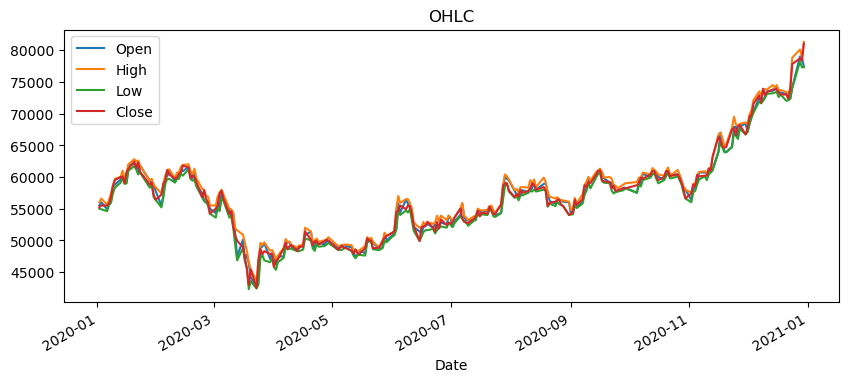

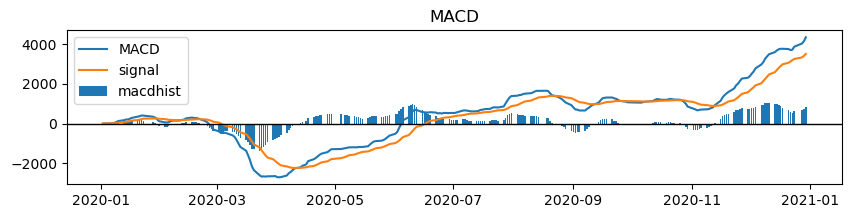

In [84]:
plot_macd(df)

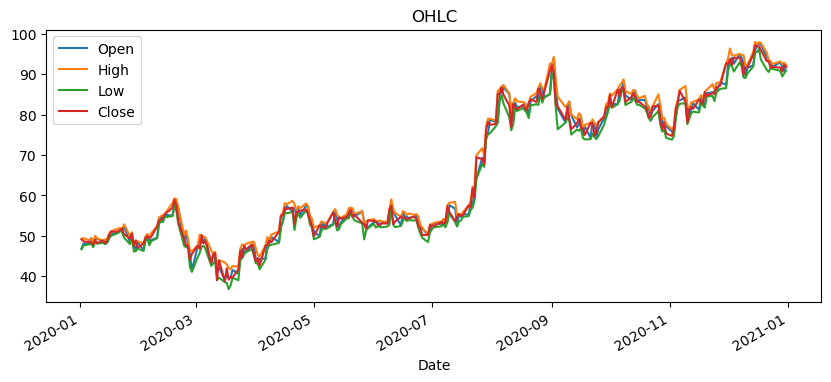

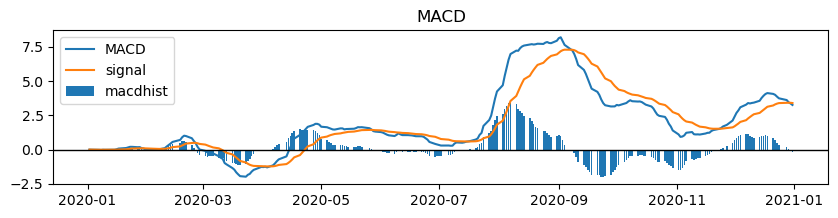

In [85]:
plot_macd(amd)

## plotly를 통한 시각화

In [86]:
# plotly 최신버전을 사용해 주세요. 최신버전이 아닐 때 동작하지 않을 수 있습니다.
# !pip install plotly --upgrade

### plotly.express 로 간단하게 시각화 하기

In [87]:
# plotly.express 로드하기
import plotly.express as px

In [95]:
# 아래 그래프 실행 시 오류가 난다면 plotly 버전을 업데이트 해주세요.
px.line(df[ohlc_col], title ='OLCD', height=300)

In [92]:
# "MACD", "signal" 을 시각화 합니다.
px.line(df[["MACD", "signal"]], title ='MACD', height=300)

In [94]:
# 막대그래프로 macdhist 를 시각화 합니다.
px.bar(df['macdhist'], title ='macdhist(macd-signal)', height=300)

### graph_objects 와 subplots 을 사용한 시각화
* [Subplots | Python | Plotly](https://plotly.com/python/subplots/)

In [96]:
# plotly의 subplots, graph_objects 로드하기
import plotly.graph_objects as go
from plotly import subplots

In [110]:
candlestick = go.Candlestick(x=df.index, open=df.Open, high=df.High, low=df.Low, close=df.Close)
macd = go.Scatter(x=df.index, y=df['MACD'], name="MACD")
signal = go.Scatter(x=df.index, y=df['signal'], name="signal")
oscillator = go.Bar(x=df.index, y=df['macdhist'], name="oscillator")
trade_volume = go.Bar(x=df.index, y=df['Volume'], name="거래량")
# layout = go.Layout(title='MACD 그래프')

In [112]:
# make_subplots을 통해 2개의 행과 1개의 컬럼을 갖는 서브플롯을 생성합니다.
# append_trace 를 통해 fig 변수 안에 시각화 하고자 하는 그래프를 넣어줍니다.
fig = subplots.make_subplots(rows=4, cols=1)
fig.append_trace(candlestick,1,1)
fig.append_trace(macd, 2, 1)
fig.append_trace(signal, 3, 1)
fig.append_trace(oscillator, 3, 1)
fig.append_trace(trade_volume, 4, 1)
fig.show()

In [ ]:
# fig.show()로 그래프를 표시합니다.

In [ ]:
# fig.show()가 동작하지 않는다면 아래의 코드를 사용해 주세요.
import plotly.offline as offline 
# plotly.offline.plot() : 로컬에 html 파일 형태로 저장된 그래프를 사용할 수 있습니다.
# plot.offline.iplot() : 주피터 노트북에 그래프가 표시되게 합니다.
offline.iplot(fig)

## MACD 값에 따른 의미와 매매지표
1. MACD > 0 : 주가 상승 추세 (12일선이 26일선 위에 위치)
2. MACD < 0 : 주가 하락 추세 (12일선이 26일선 아래에 위치)
3. MACD와 signal이 골든크로스 = OSC가 0 위로 돌파 : 단기적 주가 상승 국면
4. MACD와 signal이 데드크로스 = OSC가 0 아래로 돌파 : 단기적 주가 하락 국면